# **Credit Card Fraud Detection**

## **1. Business Objective**

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

Here, the aim is to analyze the dataset and detect the fradulent transactions.

## **2. Data Collection**

The dataset has been obtained from kaggle: https://www.kaggle.com/mlg-ulb/creditcardfraud

The data set contains the credit card transactions made by European card holders for two days of September 2013. Out of the 284,807 transactions only 492 were classified as frauds.

In [1]:
# Connecting to Google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Setting up some parameters for the workbook

plt.style.use('classic')
pd.set_option('display.max_rows', 500)
pd.options.display.max_columns = None

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (10,5)

In [4]:
# Importing sklearn libraries needed

from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## **3. Data Preparation/Preprocessing**

We will start with loading the dataset and familiarizing with it so that we can prepare the data for Machine Learning (ML) modelling.

In [5]:
# Loading the dataset

file_path = "/content/drive/My Drive/Colab Datasets/Credit Card Fraud Detection/creditcard.csv"
credit_card_data = pd.read_csv(file_path)

In [6]:
# Checking the features and no. of records in the dataset.

print("The number of records are : ", credit_card_data.shape[0])
print("The number of features are : ", credit_card_data.shape[1])
print("The list of features is : ", credit_card_data.columns)
credit_card_data.head()

The number of records are :  284807
The number of features are :  31
The list of features is :  Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# Checking the information available 

credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### **3.1 Data Cleaning**

We will begin with data cleaning such that we can handle missing values, outliers, rare values and drop the unnecessary features that do not carry useful information.

In [8]:
# Checking the percentage of missing values

print("The features and its count is as follows:\n", credit_card_data.isnull().mean() * 100)

The features and its count is as follows:
 Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64


##### There are no missing values in the dataset.

### **3.2 Exploratory Data Analysis**

After the data cleaning steps, we can now perform EDA on the dataset to discover patterns and relationships that will help in understanding the data better.

#### **3.2.1 Univariate Analysis**

We will begin with univariate anaylsis of the features and visualize their distribution that will help us determine the outliers, if any.

In [9]:
pd.set_option('precision', 3)
credit_card_data.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


Text(0.5, 0, ' ')

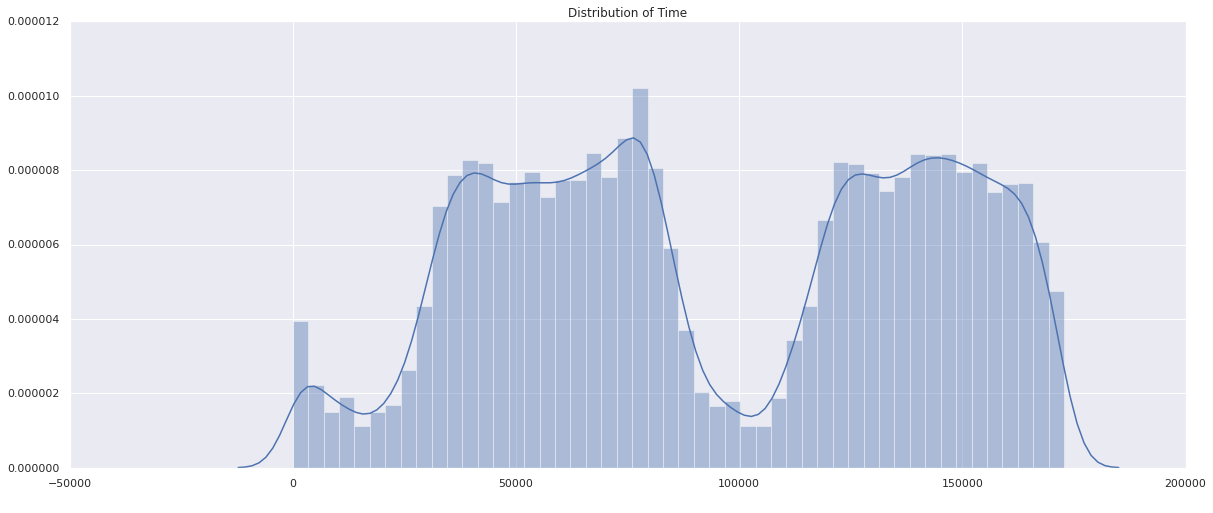

In [10]:
sns.set(style="darkgrid")

plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 8))
fig, ax1 = plot_objects

sns.distplot(credit_card_data["Time"], ax=ax1)
ax1.set_title("Distribution of Time")
ax1.set_xlabel(" ")

##### The ‘Time’ feature comes from the bimodal distribution.

Text(0.5, 0, ' ')

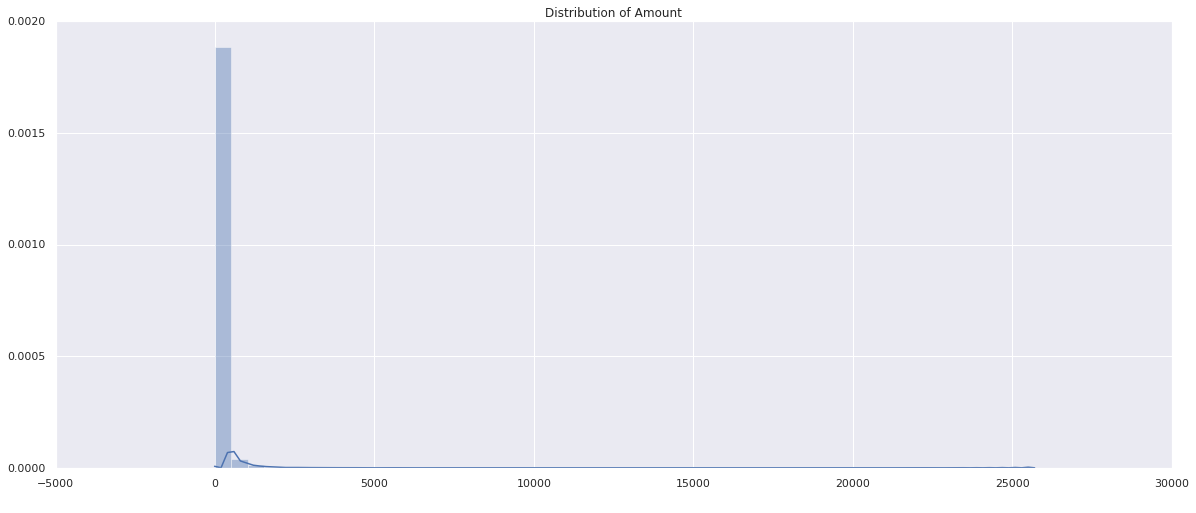

In [11]:
sns.set(style="darkgrid")

plot_objects = plt.subplots(nrows=1, ncols=1, figsize=(20, 8))
fig, ax1 = plot_objects

sns.distplot(credit_card_data["Amount"], ax=ax1)
ax1.set_title("Distribution of Amount")
ax1.set_xlabel(" ")

##### Around 88 is the mean of all credit card transactions in this data set. The biggest transaction had a monetary value of around 25,691.

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


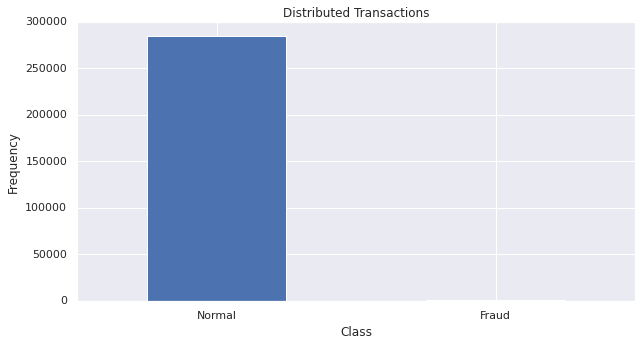

In [12]:
count_classes = pd.value_counts(credit_card_data['Class'], sort=True)
normal = count_classes[0]
fraudulent = count_classes[1]
perc_normal = (normal / (normal + fraudulent)) * 100
perc_fraudulent = (fraudulent / (normal + fraudulent)) * 100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

count_classes.plot(kind='bar', rot=0)
plt.title("Distributed Transactions")
plt.xticks(range(2), ['Normal', 'Fraud'])
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

##### We see that our data is highly imbalanced. Therefore, we cannot use any supervised learning algorithm directly because it will overfit based on the ‘Normal’ examples.

Rest of the features are scaled PCA components.

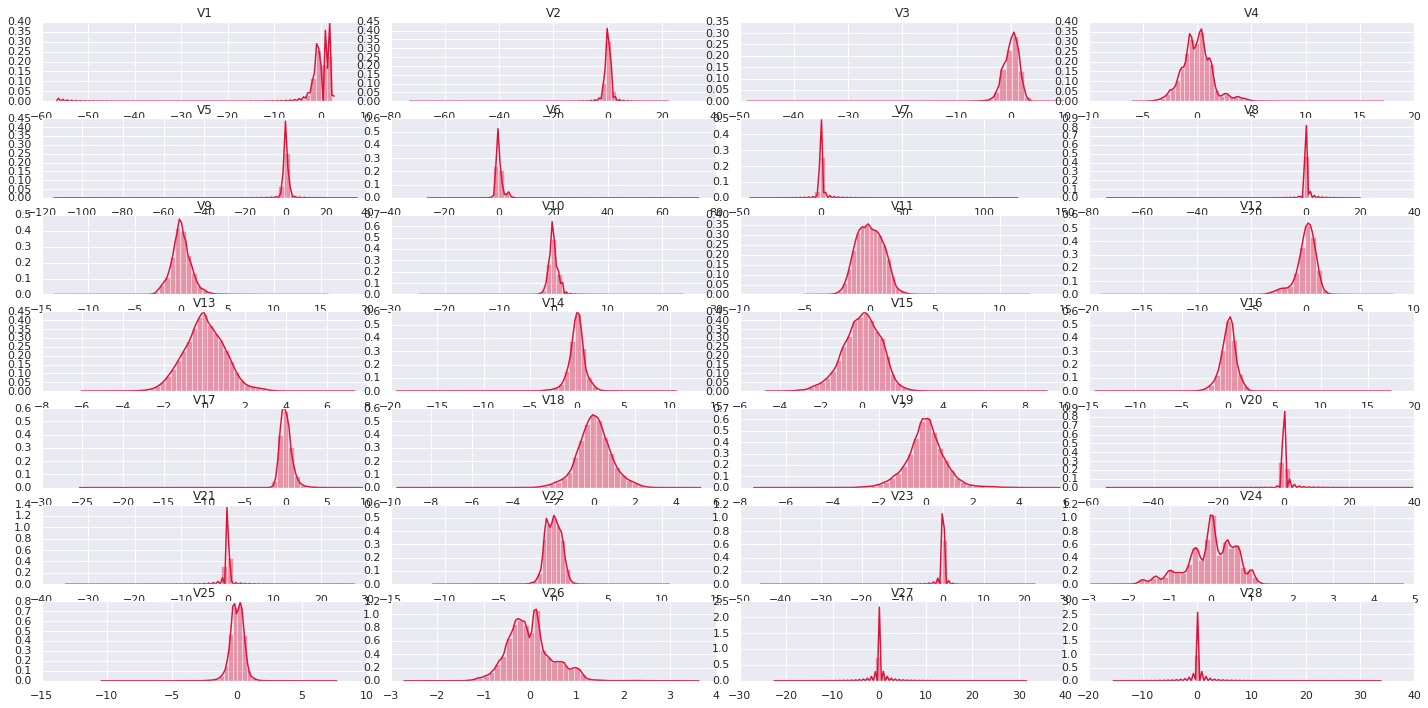

In [13]:
plot_objects = plt.subplots(nrows=7, ncols=4, figsize=(20, 10))
fig, axs = plot_objects
for i, ax in enumerate(axs.flatten()):
    ax.set_title(credit_card_data.columns[i+1])
    sns.distplot(credit_card_data.iloc[:, i+1], ax=ax, color="#DC143C", fit_kws={"color": "#4e8ef5"})
    ax.set_xlabel('')
fig.tight_layout(h_pad=-1.5, w_pad=-1.5)
plt.show()

#### **3.2.2 Bivariate Analysis**

Analyzing two features at a time, finding relations and correlations and remove multicolinear features.

Text(0.5, 1.0, 'Heatmap of Correlation')

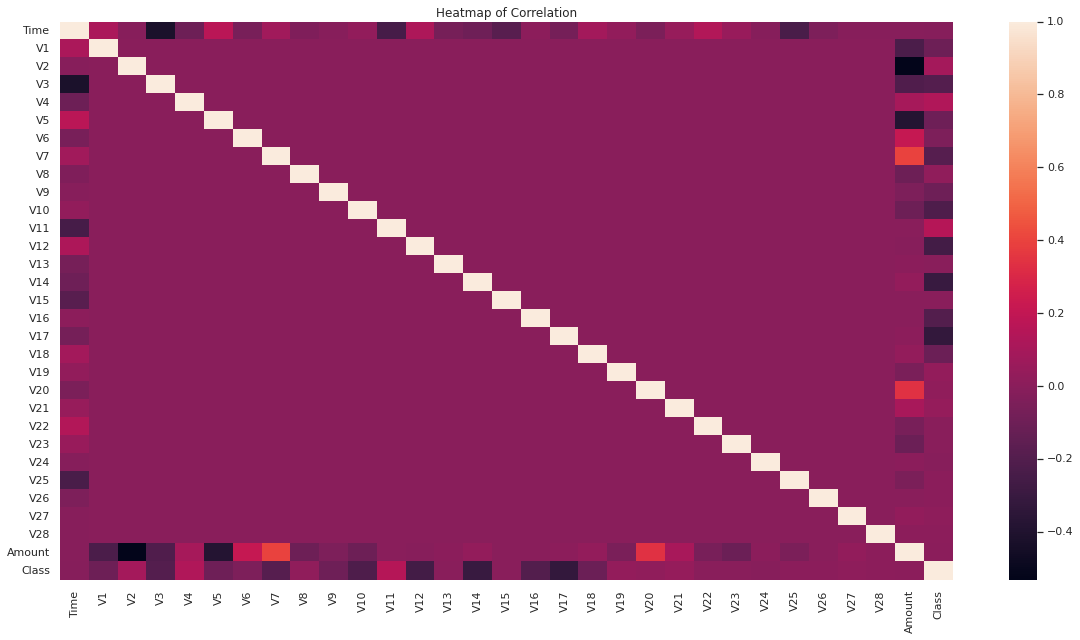

In [14]:
corr = credit_card_data.corr()
plt.figure(figsize=(20,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

##### It seems that we don’t have highly correlated features although there is a slightly negative correlation between ‘V2’ and ‘Amount’ features. The ‘Amount’ feature is slightly correlated with the other features as well.There is also a little correlation between ‘Time’ and other features

In [15]:
#skewness
skew_ = credit_card_data.skew()
skew_

Time      -0.036
V1        -3.281
V2        -4.625
V3        -2.240
V4         0.676
V5        -2.426
V6         1.827
V7         2.554
V8        -8.522
V9         0.555
V10        1.187
V11        0.357
V12       -2.278
V13        0.065
V14       -1.995
V15       -0.308
V16       -1.101
V17       -3.845
V18       -0.260
V19        0.109
V20       -2.037
V21        3.593
V22       -0.213
V23       -5.875
V24       -0.552
V25       -0.416
V26        0.577
V27       -1.170
V28       11.192
Amount    16.978
Class     23.998
dtype: float64

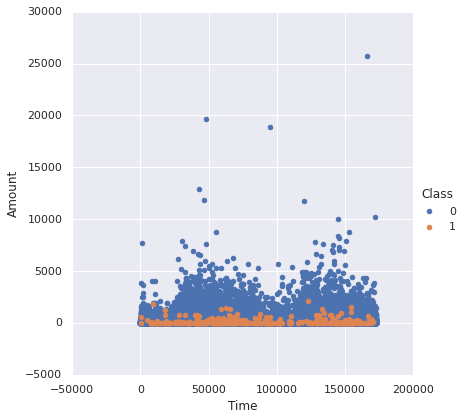

In [16]:
sns.FacetGrid(credit_card_data, hue="Class", size = 6).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

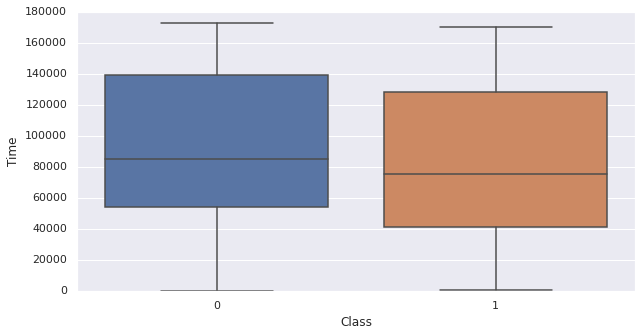

In [17]:
sns.boxplot(x = "Class", y = "Time", data = credit_card_data)
plt.show()

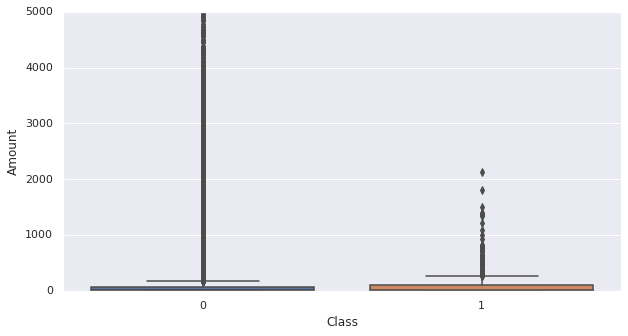

In [18]:
sns.boxplot(x = "Class", y = "Amount", data = credit_card_data)
plt.ylim(0, 5000)
plt.show()

### **3.3 Feature Scaling**

In [19]:
X_for_scale = credit_card_data.drop(["Class"], axis=1)

std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X_for_scale)

In [20]:
data = pd.DataFrame(data=X_scaled, columns=X_for_scale.columns)
data = pd.concat([data, credit_card_data[["Class"]]], axis=1)

### **3.4 Feature Selection**

While these correlations are high, it is expected to run the risk of multicollinearity. So, we can select all the features for model fitting.

## **4. Model Building**

Since the data has been prepare we can start the model building and try to obtain the best suited algorithm.

### **4.1 Train/test Splitting**

We can split the data for train/test and segregate the independent and dependent features.

In [21]:
X = data.drop(["Class"], axis=1)
y = data[["Class"]]
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, stratify=y, random_state=42)

In [22]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [23]:
# Implementing SMOTE
smt = SMOTE(random_state=0)
X_train_SMOTE, y_train_SMOTE = smt.fit_sample(X_train, y_train)

In [24]:
# Implementing Undersampling
rnd_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rnd_sampler.fit_sample(X_train, y_train)

In [25]:
np.unique(y_train_under, return_counts=True)

(array([0, 1]), array([394, 394]))

Text(0.5, 0, ' ')

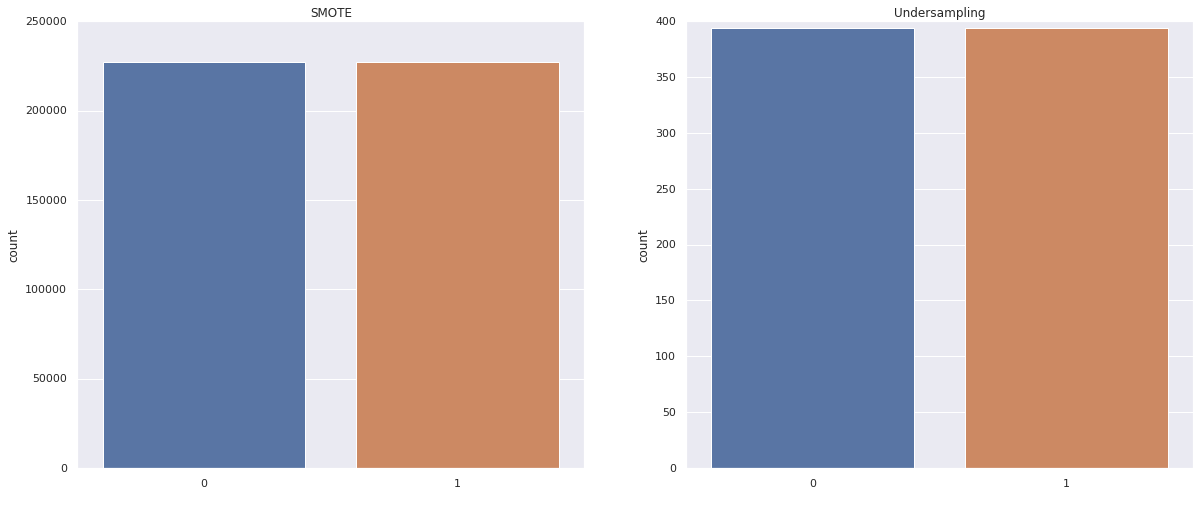

In [26]:
sns.set(style="darkgrid")
plot_objects = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
fig, (ax1, ax2) = plot_objects

sns.countplot(x = "Class", data = pd.DataFrame(y_train_SMOTE, columns=["Class"]), ax=ax1)
ax1.set_title("SMOTE")
ax1.set_xlabel(" ")

sns.countplot(x = "Class", data = pd.DataFrame(y_train_under, columns=["Class"]), ax=ax2)
ax2.set_title("Undersampling")
ax2.set_xlabel(" ")


### **4.2 Model Fitting**

Fitting various models and checking its accuracy.

In [30]:
from sklearn.model_selection import StratifiedKFold

In [31]:
# Initializaing various classification algorithms

models = []
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("QDA", QuadraticDiscriminantAnalysis()))
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("BNB", BernoulliNB()))
models.append(("GNB", GaussianNB()))
models.append(("SVM", SVC(kernel='linear')))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("AB", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))
models.append(("XGB", XGBClassifier()))

#testing models
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=3, random_state=42)
    cv_results = cross_val_score(model, X_train_under, y_train_under, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LDA: 0.968849 (0.006018)
QDA: 0.973539 (0.012151)
LR: 0.979034 (0.007883)
KNN: 0.965493 (0.003456)
BNB: 0.957707 (0.014116)
GNB: 0.958955 (0.016956)
SVM: 0.973122 (0.008718)
DT: 0.918806 (0.011840)
RF: 0.982925 (0.002667)
AB: 0.975909 (0.002213)
GBT: 0.980839 (0.003596)
XGB: 0.980973 (0.008543)


In [32]:
# Initializaing various classification algorithms

models = []
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("QDA", QuadraticDiscriminantAnalysis()))
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("BNB", BernoulliNB()))
models.append(("GNB", GaussianNB()))
models.append(("SVM", SVC()))
models.append(("DT", DecisionTreeClassifier()))
models.append(("RF", RandomForestClassifier()))
models.append(("AB", AdaBoostClassifier()))
models.append(("GBT", GradientBoostingClassifier()))
models.append(("XGB", XGBClassifier()))

#testing models
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=5, random_state=42)
    cv_results = cross_val_score(model, X_train_SMOTE, y_train_SMOTE, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LDA: 0.980847 (0.000402)
QDA: 0.982511 (0.000615)
LR: 0.991526 (0.000117)
KNN: 0.999694 (0.000081)
BNB: 0.960985 (0.000426)
GNB: 0.949080 (0.000385)
SVM: 0.998480 (0.000039)
DT: 0.998131 (0.000089)
RF: 0.999997 (0.000005)
AB: 0.996392 (0.000172)
GBT: 0.998695 (0.000035)
XGB: 0.998765 (0.000034)


##### We are getting very good scoring for KNN, Random Forest and Xgboost. We can try to optimize its hyperparameters.

In [33]:
best_results = []
best_names = []
best_results.append(results[3])
best_results.append(results[8])
best_results.append(results[11])
best_names.append(names[3])
best_names.append(names[8])
best_names.append(names[11])

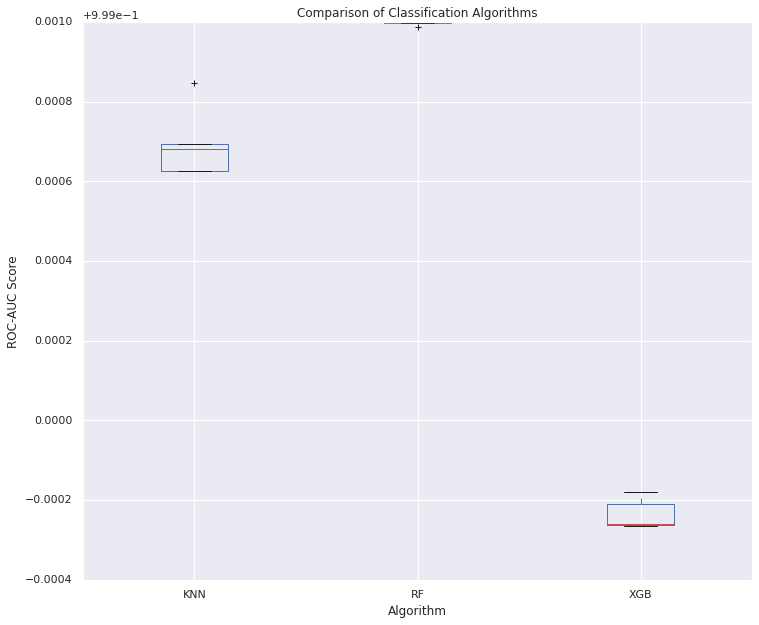

In [34]:
fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(best_results)
ax = fig.add_subplot(111)
ax.set_xticklabels(best_names)
plt.show()

### **4.3 Hyper-parameter Optimization**

Using RandomizedSearchCV we will try to find best parameters for Random Forest.

In [35]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 50)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [37]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train_SMOTE, y_train_SMOTE)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 300.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [41]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 60,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 463}

In [27]:
rf_final = RandomForestClassifier(bootstrap=False, max_depth=60, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=463)
rf_final.fit(X_train_SMOTE, y_train_SMOTE)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=60, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=463,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
y_pred = rf_final.predict(X_test)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.80      0.84        98

    accuracy                           1.00     56962
   macro avg       0.94      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962



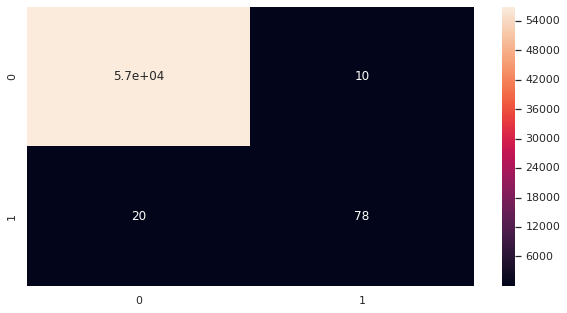

In [32]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

In [42]:
def roc_scores(X_value, Y_value, y_pred):
    model_list = [rf_final]                 
    model_name = ['Random Forest']

    # Plot ROC curve for all my models
    fig, ax = plt.subplots(figsize=(10,5))
    for i, model in enumerate(model_list):
        fpr, tpr, threshold = metrics.roc_curve(Y_value, y_pred)
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, label = (model_name[i] + ' AUC = %0.4f' % roc_auc),linewidth=2.0)
    ax.grid(False)
    ax.tick_params(length=6, width=2, labelsize = 10, grid_color='r', grid_alpha=0.5)
    leg = plt.legend(loc = 'lower right',prop={'size': 10})
    leg.get_frame().set_edgecolor('b')
    plt.title('Receiver Operating Characteristic (ROC)', FontSize=10)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-.02, 1.02])
    plt.ylim([-.02, 1.02])
    plt.ylabel('True Positive Rate',FontSize=10)
    plt.xlabel('False Positive Rate',FontSize=10)
    plt.show()

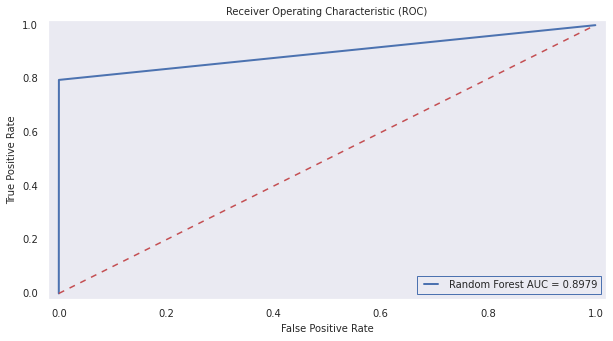

In [43]:
roc_scores(X_test, y_test, y_pred)

In [53]:
print("The Precison Score is : ",metrics.precision_score(y_test, y_pred))
print("The Recall Score is : ", metrics.recall_score(y_test, y_pred))
print("The F1 Score is : ", metrics.f1_score(y_test, y_pred))

The Precison Score is :  0.8863636363636364
The Recall Score is :  0.7959183673469388
The F1 Score is :  0.8387096774193548


### **Saving the Model**

Saving the model into a pickle file.

In [44]:
import pickle
import json

In [46]:
with open('credit_card_fraud_detection.pickle','wb') as f:
    pickle.dump(rf_final, f)

In [48]:
cat_feature_columns = {
    "data_columns" : [col for col in X.columns],
}

with open("columns.json", "w") as f:
    f.write(json.dumps(cat_feature_columns))

## **Conclusion**



##### The decision to determine which classifier is the optimal one to implement depends on the cost of missing fraudulent transactions and predicting false positives.

Using Random Forest Classifier, we were able to achieve Precision score of 88%, Recall score of 80% and F1 score of 84%.